In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Visualización de datos

In [3]:
dataframe = pd.read_csv('drive/MyDrive/Ficheros/20190321_Produccion_Fotovoltaicas.csv')

dataframe

,instalacion_fk,cil,fecha,consumo_kWh,produccion_kWh
0,1,ES0264123001068001BT1F001,2011-01-01 01:00:00,0,0
1,1,ES0264123001068001BT1F001,2011-01-01 02:00:00,0,0
2,1,ES0264123001068001BT1F001,2011-01-01 03:00:00,0,0
3,1,ES0264123001068001BT1F001,2011-01-01 04:00:00,0,0
4,1,ES0264123001068001BT1F001,2011-01-01 05:00:00,0,0
...,...,...,...,...,...
431199,7,ES0264123000613001PD1F001,2019-03-19 21:00:00,0,0
431200,7,ES0264123000613001PD1F001,2019-03-19 22:00:00,0,0
431201,7,ES0264123000613001PD1F001,2019-03-19 23:00:00,0,0
431202,7,ES0264123000613001PD1F001,2019-03-20 00:00:00,0,0


In [4]:
dataframe.drop(columns=['instalacion_fk','consumo_kWh'], inplace=True)

dataframe.index = pd.to_datetime(dataframe.fecha)

dataframe['hora'] = dataframe.index.hour

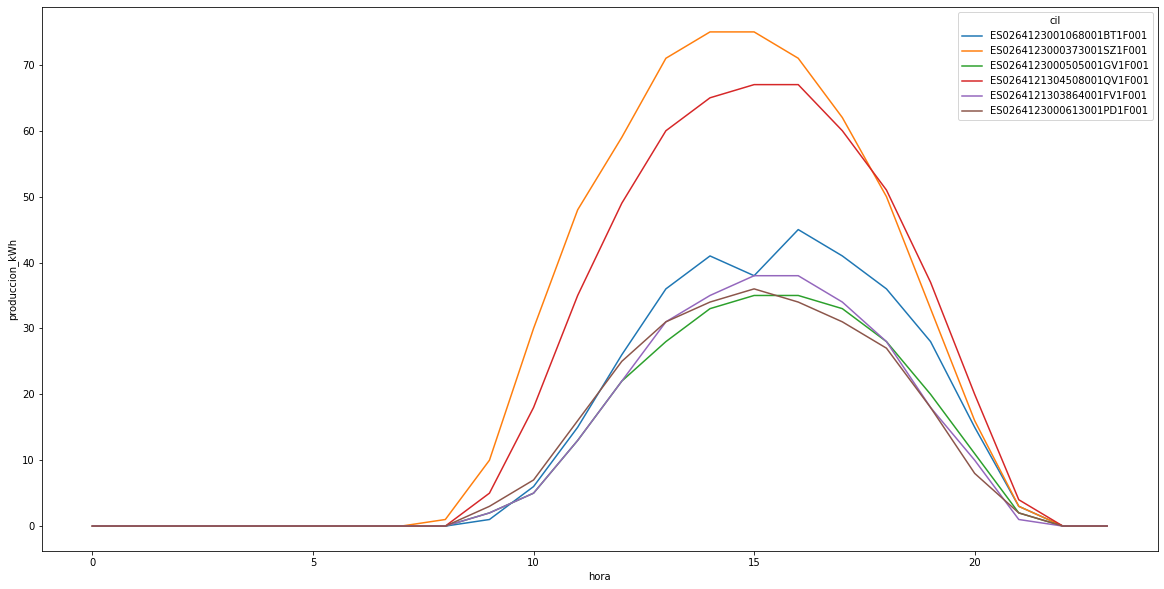

In [26]:
grafica = dataframe.loc['2012-05-10' : '2012-05-10']

fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(data=grafica, x='hora', y='produccion_kWh', hue='cil',ax=ax)


#Detección de anomalias

Primero deberemos de cargar los dataset

In [6]:
produccion = pd.read_csv('drive/MyDrive/Ficheros/20190321_Produccion_Fotovoltaicas.csv')

instalacion = pd.read_csv('drive/MyDrive/Ficheros/20190321_Instalaciones_Fotovoltaicas.csv')

Luego tendremos que unir el dataset de la produccion  con el de la instalación con el fin de saber la potenciapico de cada dato para que luego normalicemos los datos según la potenciapico de cada tipo de placa

In [7]:
dataframe2 = produccion.merge(instalacion, on='cil')

dataframe2.produccion_kWh = dataframe2['produccion_kWh']/dataframe2['potenciaPicoKw']

dataframe2.drop(columns=['instalacion_fk', 'consumo_kWh', 'numSerie', 'modelo', 'marca', 'lat',	'lng',	'potenciaNominalKw',	'potenciaPicoKw'],inplace=True )

dataframe2.index = pd.to_datetime(dataframe2.fecha)

dataframe2['hora'] = dataframe.index.hour

dataframe2.sample(10)

,cil,fecha,produccion_kWh,hora
fecha,,,,
2017-07-12 06:00:00,ES0264123001068001BT1F001,2017-07-12 06:00:00,0.000000,6
2016-06-13 02:00:00,ES0264123000373001SZ1F001,2016-06-13 02:00:00,0.000000,2
2019-02-18 17:00:00,ES0264121304508001QV1F001,2019-02-18 17:00:00,0.142732,17
2015-05-12 06:00:00,ES0264121303864001FV1F001,2015-05-12 06:00:00,0.000000,6
2015-12-22 16:00:00,ES0264123000613001PD1F001,2015-12-22 16:00:00,0.142429,16
2018-03-26 15:00:00,ES0264123001068001BT1F001,2018-03-26 15:00:00,0.595861,15
2013-01-10 08:00:00,ES0264123001068001BT1F001,2013-01-10 08:00:00,0.000000,8
2016-01-31 13:00:00,ES0264123001068001BT1F001,2016-01-31 13:00:00,0.467026,13
2011-02-06 21:00:00,ES0264123000613001PD1F001,2011-02-06 21:00:00,0.000000,21


##Selecionamos un dia concreto

Como podemos observar la estación SZ (amarilla) no está produciendo correctamente.

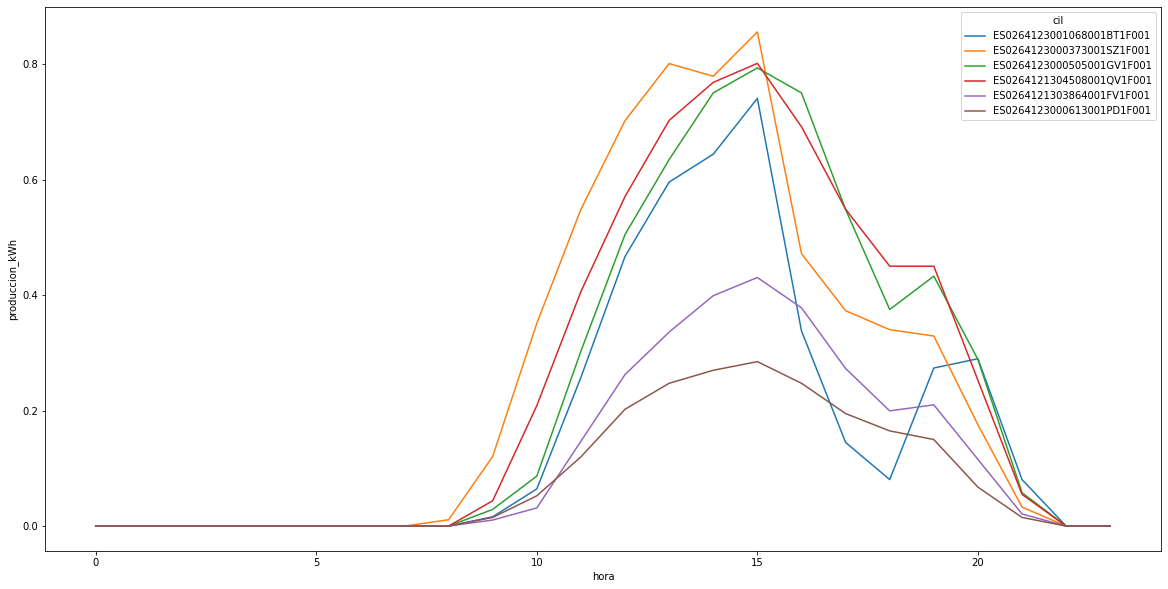

In [22]:
grafica2 = dataframe2.loc['2016-05-15' : '2016-05-15']

fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(data=grafica2, x='hora', y='produccion_kWh', hue='cil',ax=ax)

Para detectar dichas anomalias utilizamos el algoritmo DBSCAN para que me agrupe por densidad de horas con un minimo de 2 por grupos ya que 2 instalaciones suelen producir lo mismo y las 4 cuatros muy parecidas entre ellas.
Al clasificar y ver que se hay algunos puntos no clasificados significa que es una supuesta anomalia.

In [25]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN(min_samples=2, eps=0.20)

df = dataframe2.drop(columns=['cil','fecha']).loc['2016-05-15' : '2016-05-15']

modelo.fit(df)

agrupaciones = modelo.labels_

agrupaciones.shape = (6,24)

print(agrupaciones.shape)

for i in range(agrupaciones.shape[0]):
  for j  in range(agrupaciones.shape[1]):
    if agrupaciones[i][j] == -1:
      print(f"Anomalía en la instalacion {i+1} a las {j}")


(6, 24)
Anomalía en la instalacion 3 a las 12
Anomalía en la instalacion 3 a las 13
Anomalía en la instalacion 3 a las 14
Anomalía en la instalacion 3 a las 15
Anomalía en la instalacion 3 a las 16
Anomalía en la instalacion 3 a las 17
Anomalía en la instalacion 3 a las 18
